In [1]:
import sys
import scipy.io as sio
import numpy as np
sys.path.append("../src")
import TopologicalAdvection as TA
import matplotlib.pyplot as plt

In [2]:
filein_contents = sio.loadmat('tau.1.05_20000pt_.01step.mat')
times = filein_contents['times'][:,0].tolist()
xin = filein_contents['x_coordinates'].tolist()
yin = filein_contents['y_coordinates'].tolist()
print("There are ", len(times), " time-steps, and ",len(xin), " potential trajectories.")

There are  2227  time-steps, and  20000  potential trajectories.


In [3]:
numtraj_vals = [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20000]
val_choice = 5
numtraj = numtraj_vals[val_choice]
traj = []
for t in range(len(times)):
    traj.append([[xin[i][t],yin[i][t]] for i in range(numtraj)])

In [4]:
Domain = TA.HF.GetBoundingDomain(traj[0], frac = 0.2)

In [5]:
print(Domain)
print(len(times), len(traj))

[[-1.0906276140885225, -1.3814136091237783], [7.14871088547801, 1.3850356941000723]]
2227 2227


In [6]:
TopAdvec = TA.TopologicalAdvection(traj, times, Domain)

In [7]:
TE, TE_err, Weights = TopAdvec.GetTopologicalEntropy()

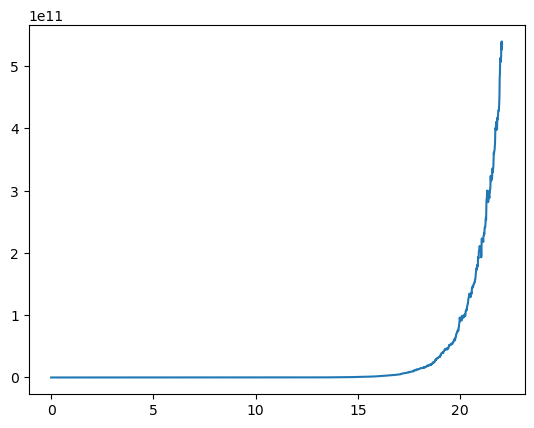

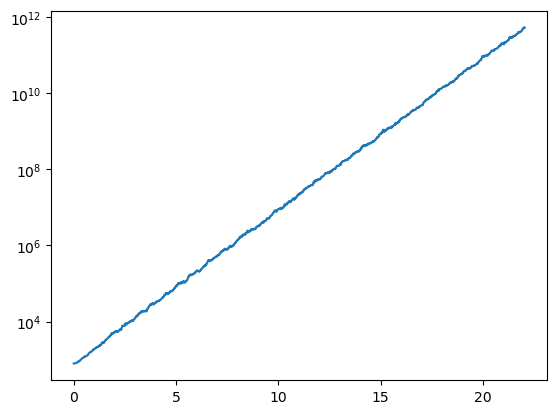

In [9]:
plt.plot(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()
plt.semilogy(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()

In [ ]:
print(len(TopAdvec.Times),len(TopAdvec.Tslices), len(TopAdvec.TotalWeightOverTime))

In [ ]:
print(TopAdvec.TotalWeightOverTime[0])
loopM = TopAdvec.TA.Loop(TopAdvec.tri_init, mesh = True)
print(loopM.GetWeightTotal())
W1 = TopAdvec.tri.OperatorAction(loopM,option = 3)
print(len(W1), len(TopAdvec.Times))
print(TopAdvec.TotalWeightOverTime[-1])
print(loopM.GetWeightTotal())

In [ ]:
stop_pt = 1
TopAdvec = TA.TopologicalAdvection(traj[:stop_pt+1], times[:stop_pt+1], Domain)
TopAdvec.EvolveTri()
#print(TopAdvec.TotalWeightOverTime[0])
loopM = TopAdvec.TA.Loop(TopAdvec.tri_init, mesh = True)
print(loopM.GetWeightTotal())
W1 = TopAdvec.tri.OperatorAction(loopM,option = 3, num_times = TopAdvec.num_times)
print(len(W1), len(TopAdvec.Times), len(TopAdvec.Tslices))
#print(TopAdvec.TotalWeightOverTime[-1])
print(loopM.GetWeightTotal())
print(len(TopAdvec.tri.WeightOperatorList))
for WO in TopAdvec.tri.WeightOperatorList:
    print(WO.time)

In [ ]:
TopAdvec.num_times

In [ ]:
#test loop initialization

loop1 = TA.Loop(triInit, rbands = [[0,1]], curves = None, Shear = False, mesh = False)
loop2 = TA.Loop(triInit, rbands = None, curves = [[[[1,-0.5],[5,-0.5],[5,0.5],[1,0.5]],True]], Shear = False, mesh = False)
loop3 = TA.Loop(triInit, rbands = None, curves = [[[[1,-0.5],[5,-0.5],[5,0.5],[1,0.5]],True]], Shear = True, mesh = False)
loop4 = TA.Loop(triInit, rbands = None, curves = None, Shear = True, mesh = True)

In [ ]:
triInit.Plot(loop2)

In [ ]:
tri.OperatorAction(loop1, index = None, Reverse = False, option = 3)
tri.OperatorAction(loop2, index = None, Reverse = False, option = 1)
tri.OperatorAction(loop3, index = None, Reverse = False, option = 2)
tri.OperatorAction(loop4, index = None, Reverse = False, option = 1)

In [ ]:
PP = TA.PrintParameters(Delaunay = True, linewidth_tt = 2, frac = 0.9)
tri.Plot(loop2,PP)